In [8]:
import pandas as pd
from sklearn.datasets import load_digits
digit = load_digits()

In [21]:
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [16]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
df = pd.DataFrame(digit.data,columns = digit.feature_names)
df['Target'] = digit.target
df.shape

(1797, 65)

In [22]:
from sklearn.model_selection import train_test_split

In [26]:
x = df.drop('Target',axis = 1)
y = df.Target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 20)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)

In [67]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9888888888888889

In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors = 3),x,y,cv = 5)
scores.mean()

0.966621788919839

In [69]:
from sklearn.metrics import confusion_matrix
y_p = knn.predict(X_test)
cm = confusion_matrix(y_test,y_p)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  1, 29]], dtype=int64)

Text(69.0, 0.5, 'Truth')

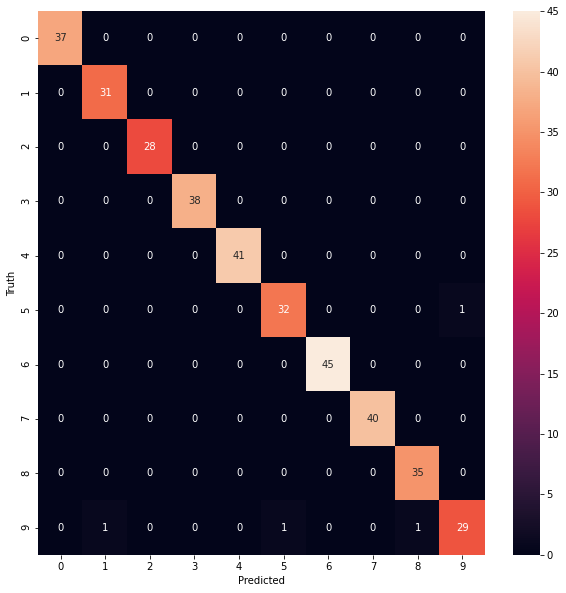

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        41
           5       0.97      0.97      0.97        33
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        40
           8       0.97      1.00      0.99        35
           9       0.97      0.91      0.94        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

